In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X=dataset.iloc[:,0]
Y=dataset.iloc[:,1]
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [7]:
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [8]:
m=dataset.iloc[ : ,:-1]
n=dataset.iloc[ : ,-1]
m

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
n

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

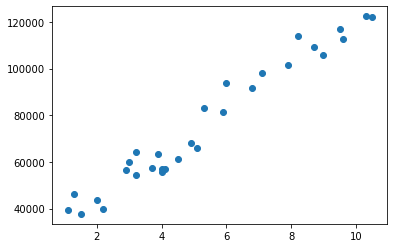

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(m,n,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()   #creating model
lr.fit(x_train,y_train) #trained the model

LinearRegression()

In [13]:
pred=lr.predict(x_test)
pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [14]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,pred))
rmse

3580.979237321345

In [16]:
pd.DataFrame({'actual':y_test,'prediction':pred,'error':(y_test-pred)})

,actual,prediction,error
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


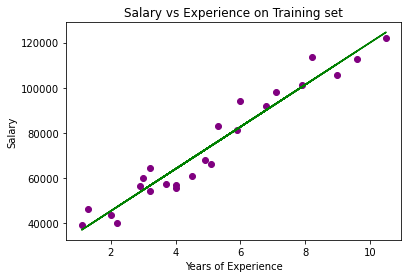

In [17]:
plt.scatter(x_train, y_train, color ='purple')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.title('Salary vs Experience on Training set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

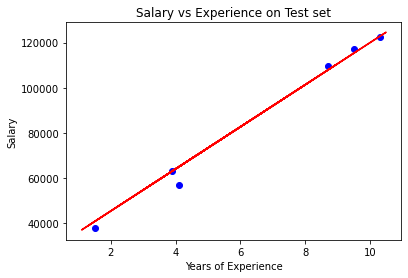

In [18]:
plt.scatter(x_test, y_test, color ='blue')
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.title('Salary vs Experience on Test set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [19]:
m=0
c=0
L=0.01
epochs=1000
n=float(len(X))

for i in range(epochs):
    Y_curr=(m*X)+c
    m_grad=(-2/n)*sum((X*Y-X*Y_curr))   
    c_grad=(-2/n)*sum((Y-Y_curr))
    m=m-(L*m_grad)
    c=c-(L*c_grad)

print(m)
print(c)

9501.013219578916
25448.181745946968


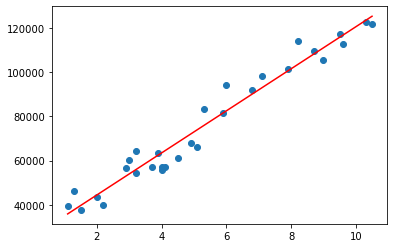

In [20]:
Y_Pred= m*X+c   #similar to y=mx+c
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(Y_Pred),max(Y_Pred)],color='red')
plt.show()

In [21]:
pd.DataFrame({'actual':y_test,'prediction':Y_Pred,'error':(y_test-Y_Pred)})

,actual,prediction,error
0,NaN,35899.296287,NaN
1,NaN,37799.498931,NaN
2,37731.0,39699.701575,-1968.701575
3,NaN,44450.208185,NaN
4,NaN,46350.410829,NaN
5,NaN,53001.120083,NaN
6,NaN,53951.221405,NaN
7,NaN,55851.424049,NaN
8,NaN,55851.424049,NaN
9,NaN,60601.930658,NaN
